**Abstract**

Parkinson's disease is a progressive central nervous system condition that affects movement and causes tremors and stiffness.

It has 5 stages to it and an estimated seven to 10 million people worldwide have Parkinson’s disease. 

This is chronic and still has no cure. It is a neurodegenerative disease that affects the neurons in the brain that contain dopamine.



Load the data, get the features and labels, scale the features, then split the dataset, build a model and use different algorithms , and then calculate the accuracy of our model.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Details About the Data Set

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. 

The original study published the
feature extraction methods for general voice disorders.

Number of Instances: 195

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

File Size: 39.7 KB



In [2]:
# Load the Dataset
df=pd.read_csv('parkinsons.data')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.shape

(195, 24)

Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

The below link has more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf

In [4]:
#find null Values in the data set

df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [6]:
# Finding Unique values in the columns

for i in df.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************************* name ************************************************************

{'phon_R01_S31_1', 'phon_R01_S16_5', 'phon_R01_S05_1', 'phon_R01_S06_6', 'phon_R01_S07_4', 'phon_R01_S18_6', 'phon_R01_S34_4', 'phon_R01_S26_3', 'phon_R01_S49_6', 'phon_R01_S43_5', 'phon_R01_S22_1', 'phon_R01_S49_2', 'phon_R01_S44_2', 'phon_R01_S27_3', 'phon_R01_S32_6', 'phon_R01_S39_5', 'phon_R01_S05_2', 'phon_R01_S43_6', 'phon_R01_S31_6', 'phon_R01_S50_3', 'phon_R01_S07_5', 'phon_R01_S13_1', 'phon_R01_S13_5', 'phon_R01_S32_3', 'phon_R01_S08_3', 'phon_R01_S27_6', 'phon_R01_S22_4', 'phon_R01_S18_1', 'phon_R01_S25_3', 'phon_R01_S02_1', 'phon_R01_S06_5', 'phon_R01_S02_6', 'phon_R01_S26_2', 'phon_R01_S07_3', 'phon_R01_S34_6', 'phon_R01_S42_2', 'phon_R01_S27_2', 'phon_R01_S05_6', 'phon_R01_S04_1', 'phon_R01_S08_4', 'phon_R01_S33_4', 'phon_R01_S04_3', 'phon_R01_S27_4', 'phon_R01_S26_6', 'phon_R01_S50_2', 'phon_R01_S33_6', 'phon_R01_S08_6', 'phon_R01_S42_1', 'phon_R01_S35_7', 

AxesSubplot(0.125,0.125;0.775x0.755)


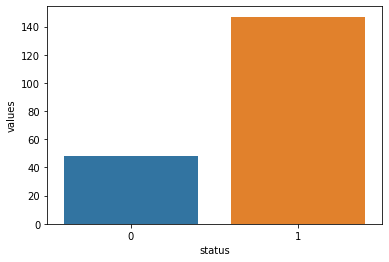

In [7]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df= pd.DataFrame({'status': temp.index,'values': temp.values})
print(sns.barplot(x = 'status', y="values", data=temp_df))

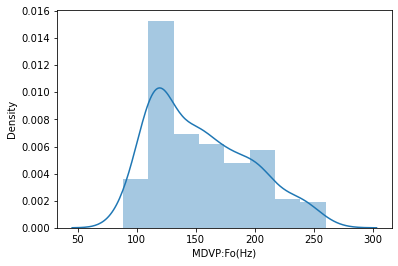

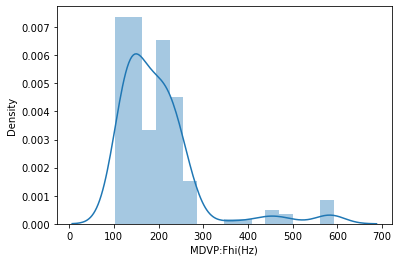

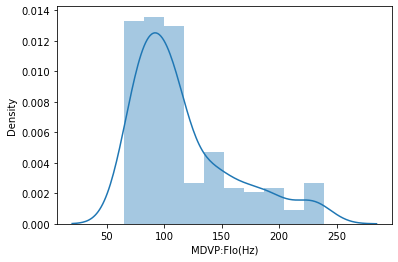

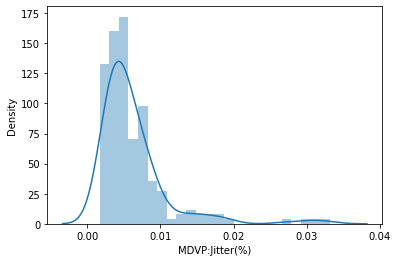

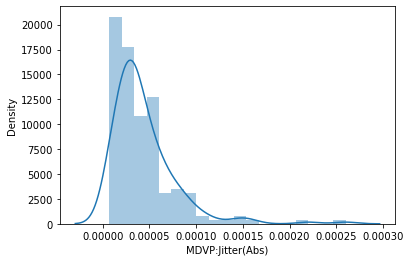

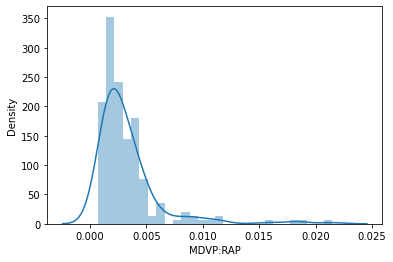

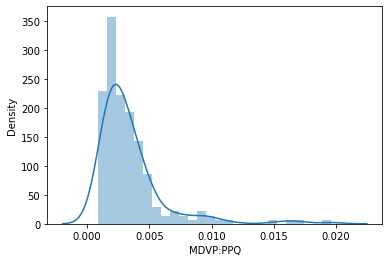

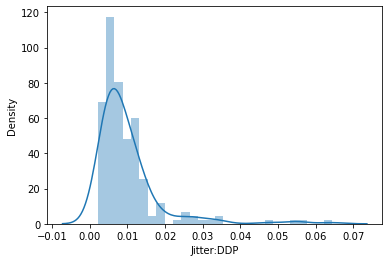

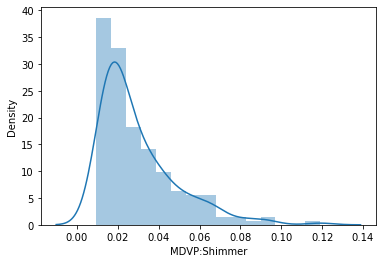

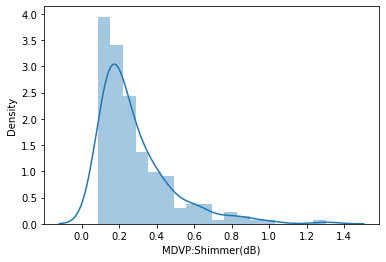

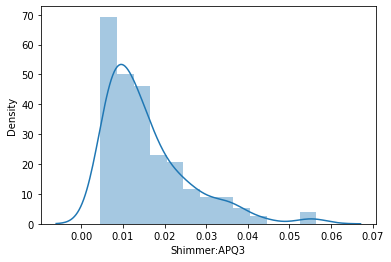

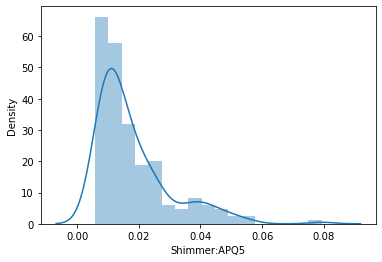

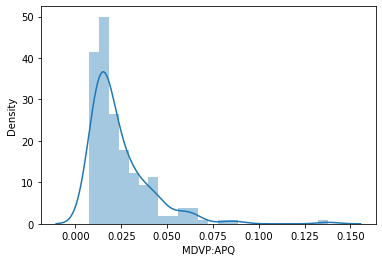

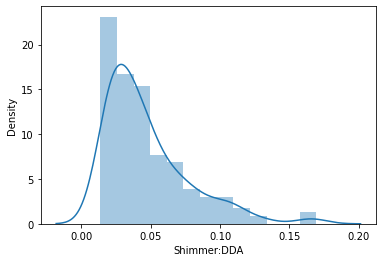

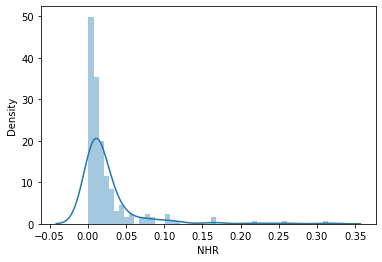

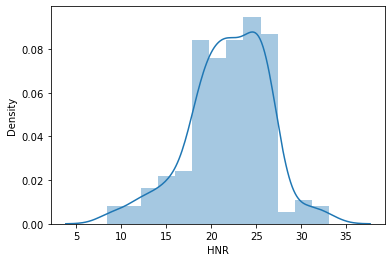

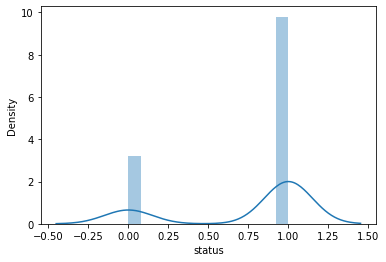

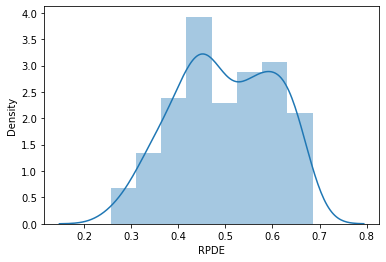

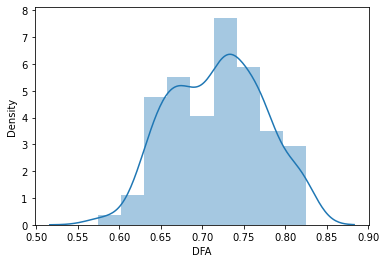

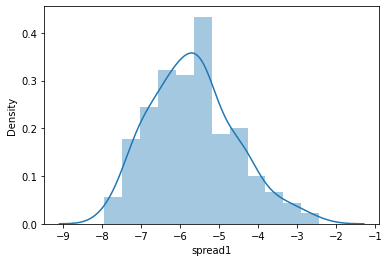

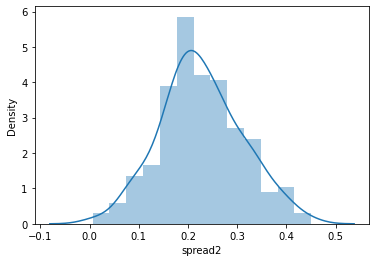

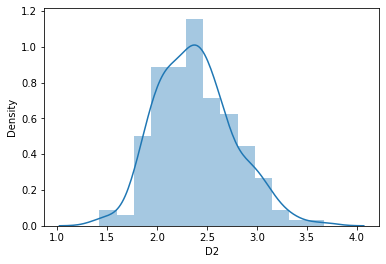

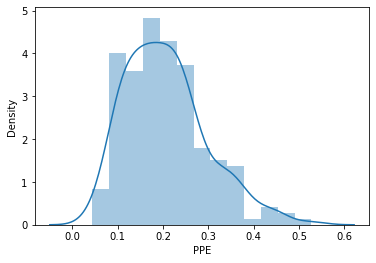

In [8]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

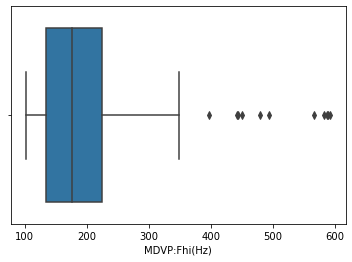

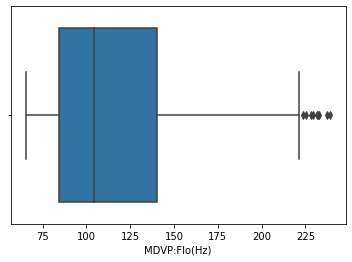

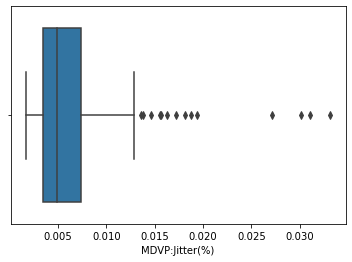

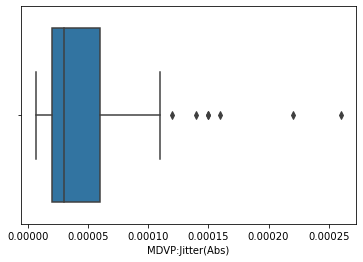

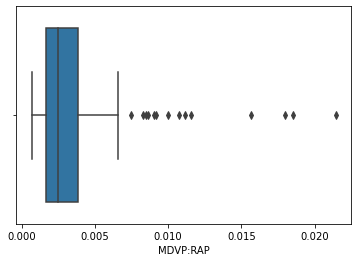

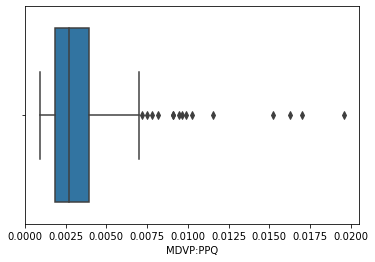

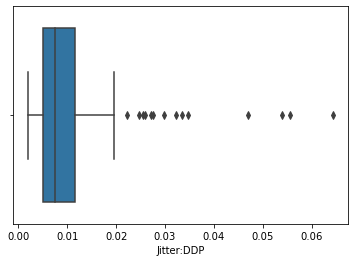

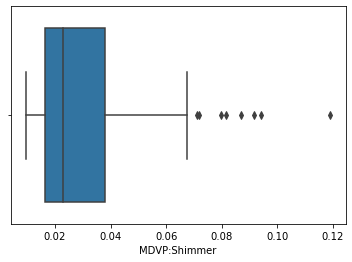

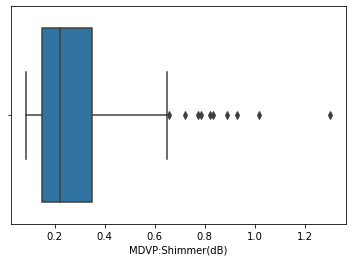

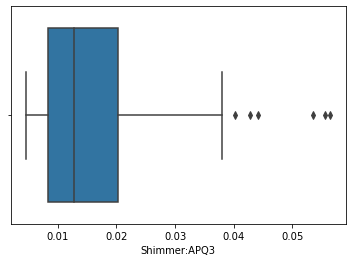

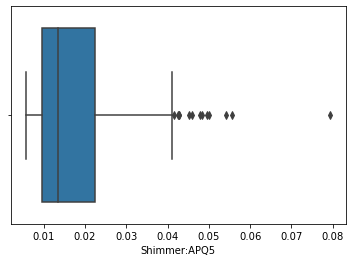

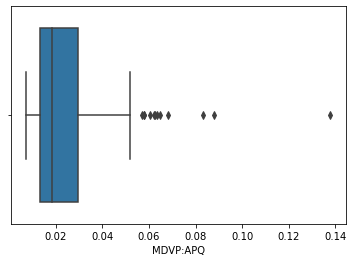

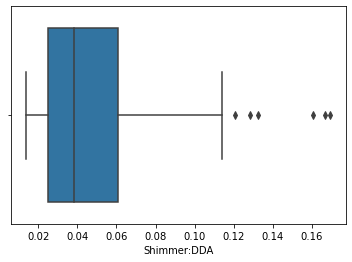

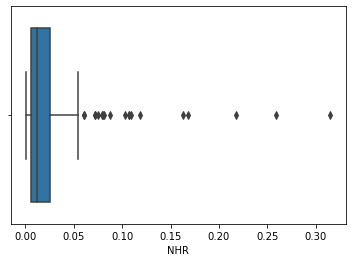

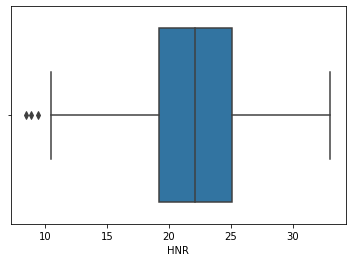

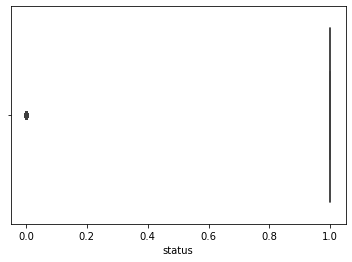

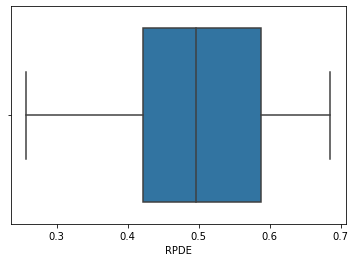

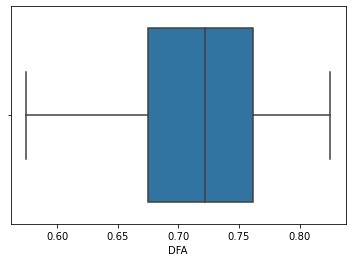

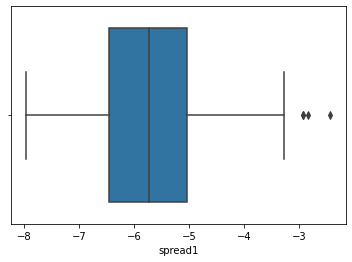

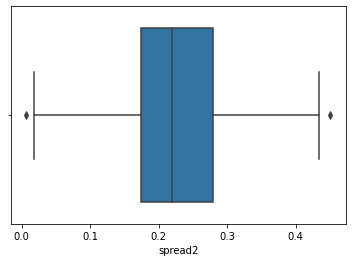

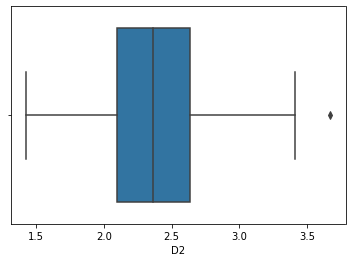

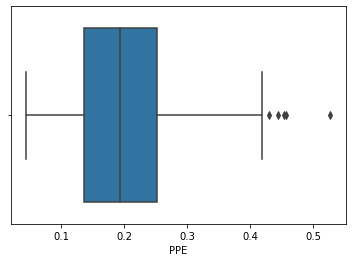

In [9]:
# Find the distribution of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

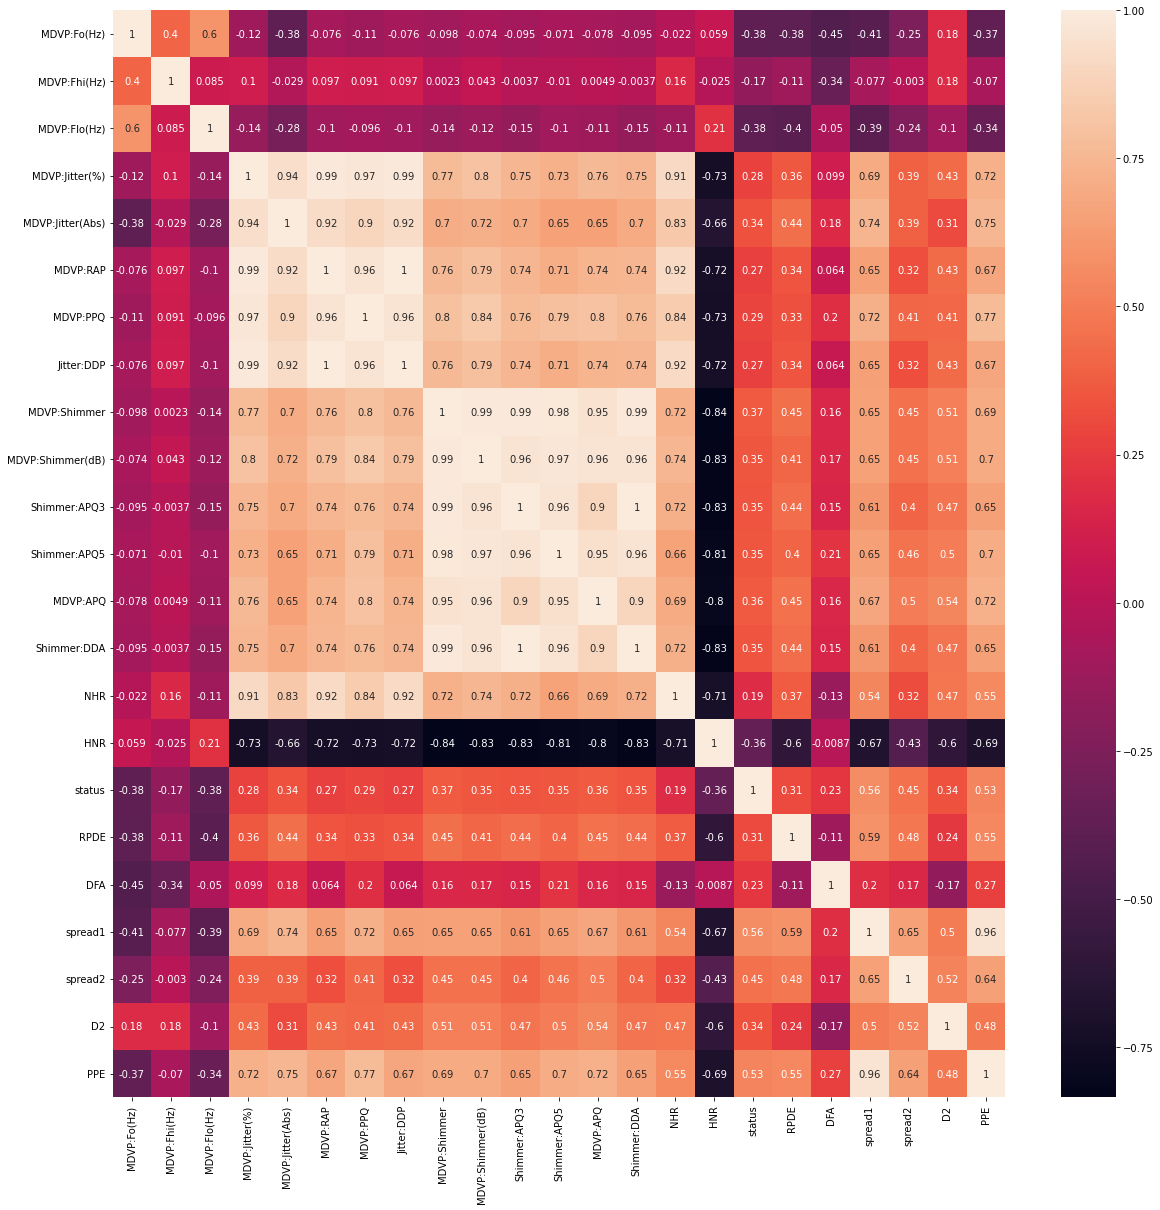

In [10]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [11]:
# making some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [12]:
# Detecting the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({1: 147, 0: 48})


In [13]:
# Balancing the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [14]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 
#The MinMaxScaler transforms features by scaling them to a given range.

# Scaling is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance 
# between the data points is important.

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.

This overview may uncover the relationships between observations and variables, and among the variables.

In [15]:
# Applying Feature Engineering

# Applying PCA 

# The code below has .95 for the number of components parameter. 
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 8 columns to keep 95% of the variance

(294, 22)
(294, 8)


Now split the Dataset in to Train and Test and make use of algorithms such as logistic regression, decision Tree, random forest, Svm,Gaussian Naive Bayes, Bernoulli Naive Bayes, KNN. and study the Accuracy of each model and predict the disease.

In [16]:
#split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

                       Method Used  Accuracy
0              Logistic Regression  0.847458
1                     Decison Tree  0.966102
2  Random Forest(information gain)  1.000000
3           Random Forest(Entropy)  1.000000
4                              SVM  0.949153
5                              KNN  0.983051
6                              gnb  0.881356
7                              bnb  0.830508
8                voting classifier  0.881356
AxesSubplot(0.125,0.125;0.775x0.755)


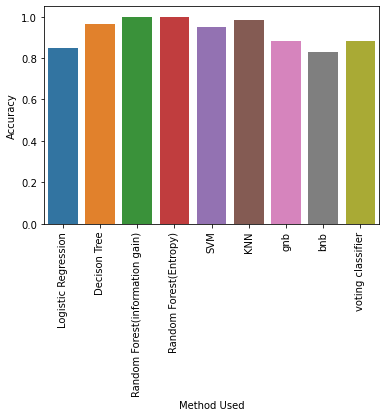

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

list_met=[]
list_accuracy=[]

# Applying all the algorithms

# Apply Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)


# Apply Decison Tree

from sklearn.tree import DecisionTreeClassifier


classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)

# Apply Random Forest criteria=information gain

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)

# Apply Random Forest criteria=entropy

from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)

# similarly apply SVM

from sklearn.svm import SVC

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)

# Apply KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)

#Apply Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)

#Apply Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# Combining all the above using voting classifier

from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)

list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)



In [18]:
#Initialize an XGBClassifier and train the model.
#Train the model
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

[00:59:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
#Finally, generate y_pred (predicted values for x_test) and calculate the accuracy for the model. 
#Calculate the accuracy
y_pred=model_xg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

98.30508474576271


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xg.predict(x_test))

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, model_xg.predict(x_test), average='binary')

0.9855072463768115

In [22]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
print(classification_report(y_test, model_xg.predict(x_test)))
print('Confusion Matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        35

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix:
[[24  0]
 [ 1 34]]


In [23]:
for i in list3:
    print("****************************************** ",i," **********************************************")
    print(classification_report(y_test, i.predict(x_test)))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, i.predict(x_test)))
    print()

******************************************  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')  **********************************************
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.83      0.87        35

    accuracy                           0.85        59
   macro avg       0.84      0.85      0.84        59
weighted avg       0.85      0.85      0.85        59

Confusion Matrix:
[[21  3]
 [ 6 29]]

******************************************  DecisionTreeClassifier(random_state=14)  **********************************************
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Confusion Matrix:
[[24 

In [24]:
# Visualizing performance with ROC

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

def plot_roc(model, X_test, y_test):
    # calculating the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

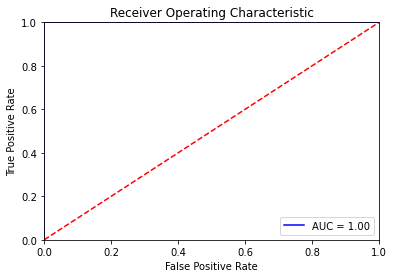

In [25]:
plot_roc(model_xg, x_test, y_test)


------------------ROC FOR  Logistic Regression  + PCA ---------------------------


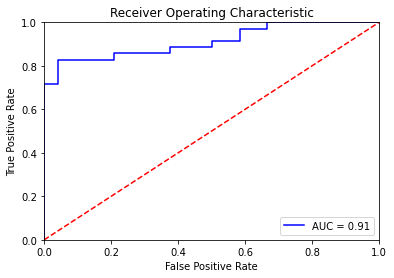



------------------ROC FOR  Decison Tree  + PCA ---------------------------


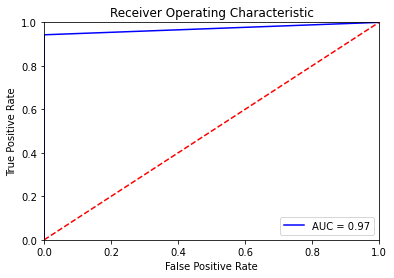



------------------ROC FOR  Random Forest(information gain)  + PCA ---------------------------


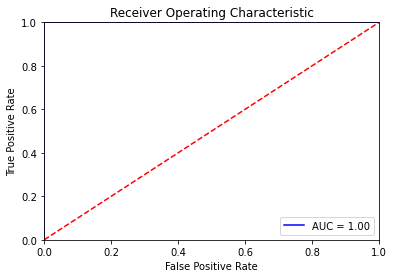



------------------ROC FOR  Random Forest(Entropy)  + PCA ---------------------------


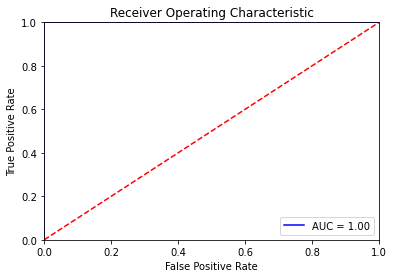



------------------ROC FOR  SVM  + PCA ---------------------------
roc not valid

------------------ROC FOR  KNN  + PCA ---------------------------


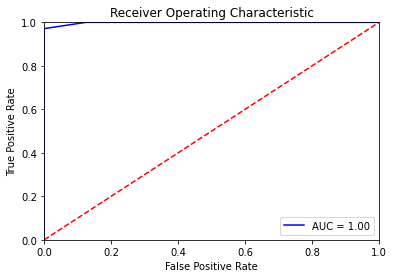



------------------ROC FOR  gnb  + PCA ---------------------------


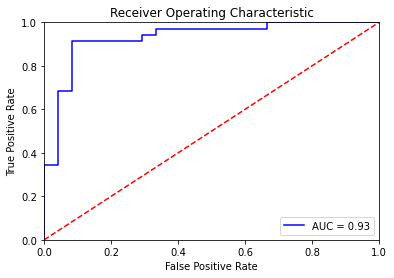



------------------ROC FOR  bnb  + PCA ---------------------------


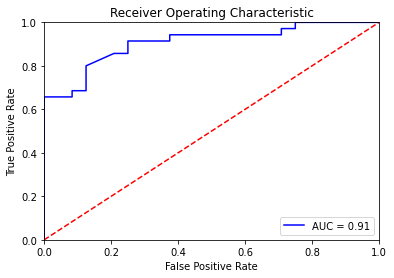

In [26]:
for i in range(0,len(list3)):
    try:
        print()
        print("------------------ROC FOR ",list1[i]," + PCA ---------------------------")
        plot_roc(list3[i], x_test, np.array(y_test))
        print()
    except:
        print("roc not valid")

From the plots and classification reports we can make a conclusion that for this particular problem Random Forest Classifier algorithms predicts the results with the most accuracy and hence should be the one used.43 